In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_auc_score

In [2]:
filename = 'bank-additional-full.csv'
df= pd.read_csv(filename, sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


## Exploratory Data Analysis

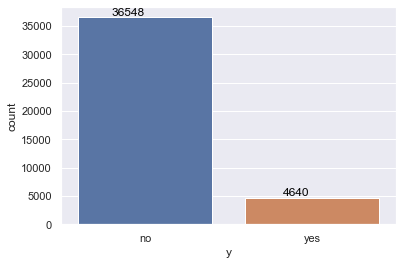

In [6]:
#Show value counts for the y categorical variable

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="y", data = df)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [7]:
##Univariate analysis of Categorical variables
def countplot(label, dataset):
  plt.figure(figsize=(20,10))  
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

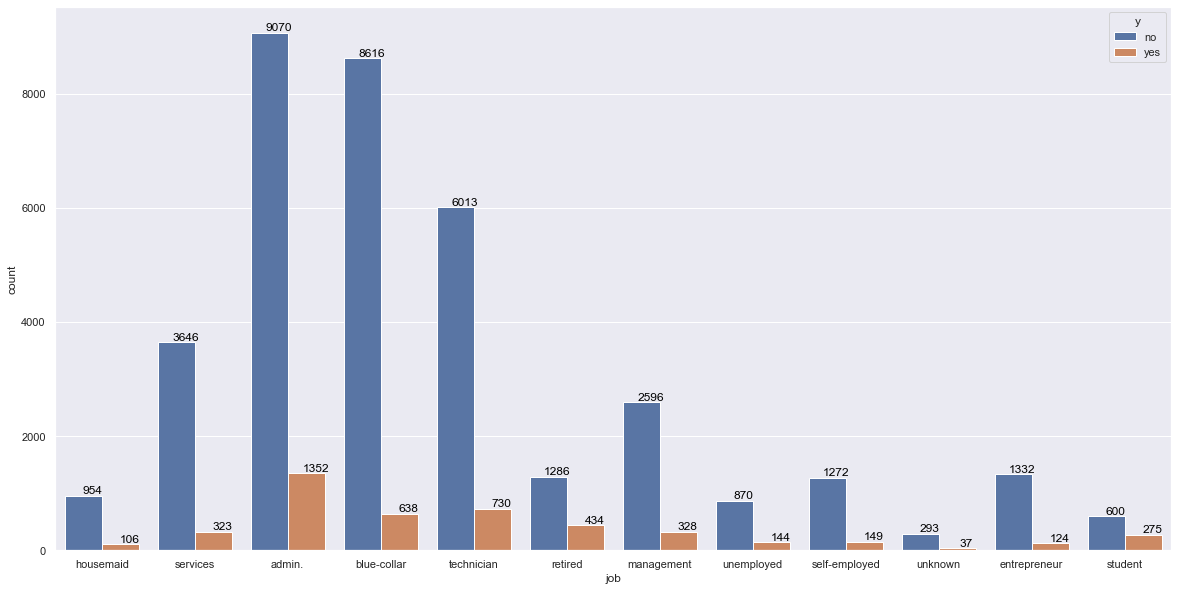

In [8]:
countplot('job', df)

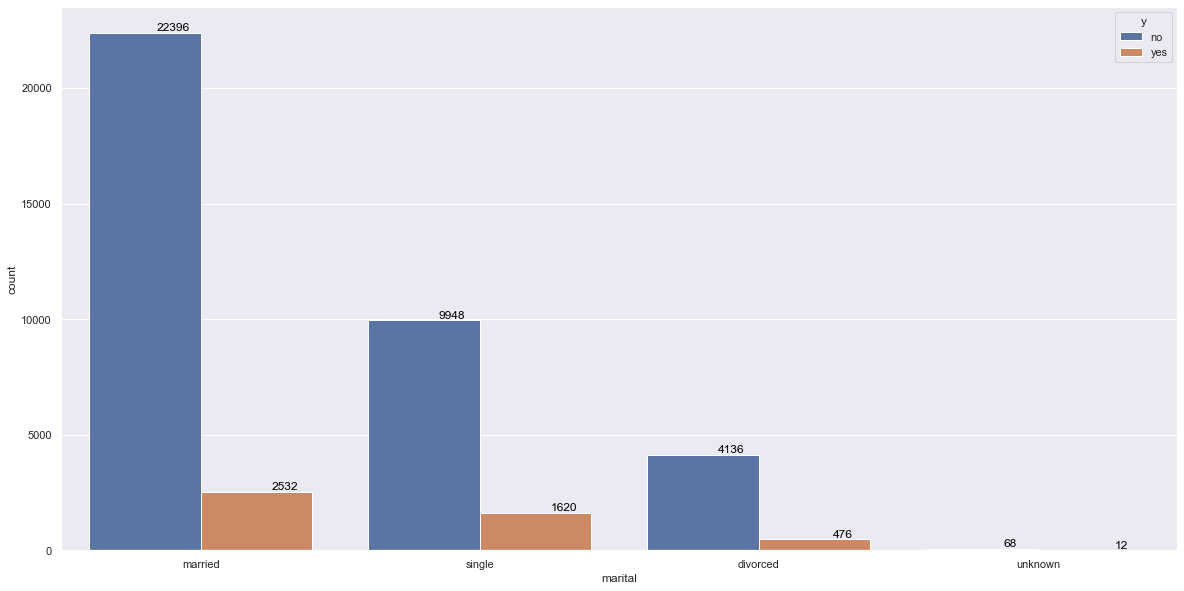

In [9]:
countplot('marital', df)

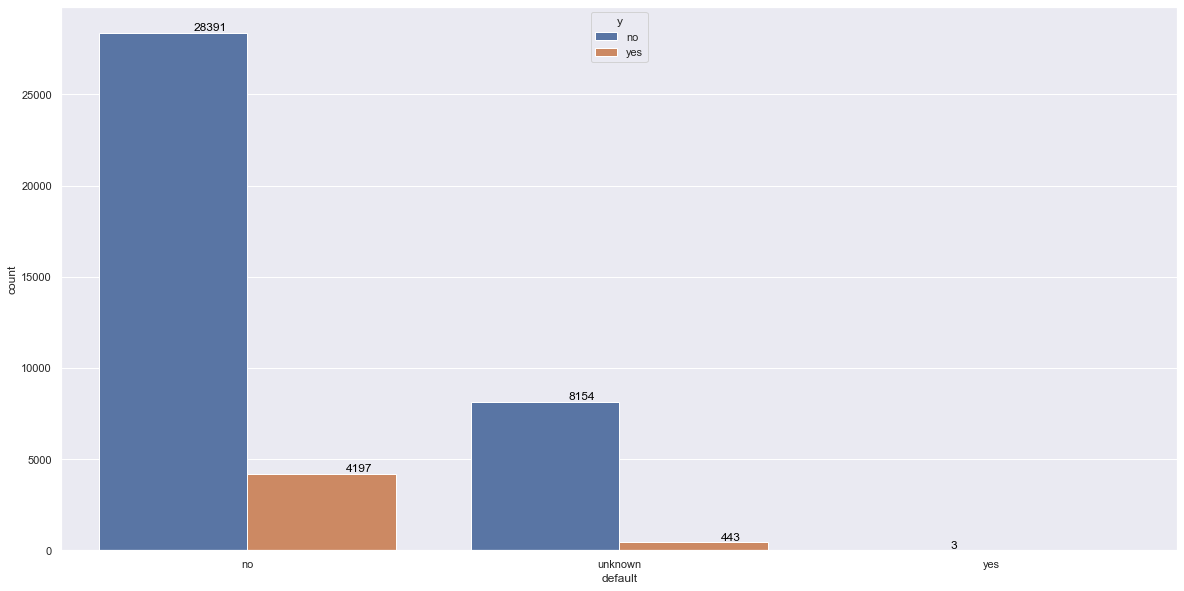

In [10]:
#default: has credit in default? (categorical: "no","yes","unknown")
countplot('default', df)

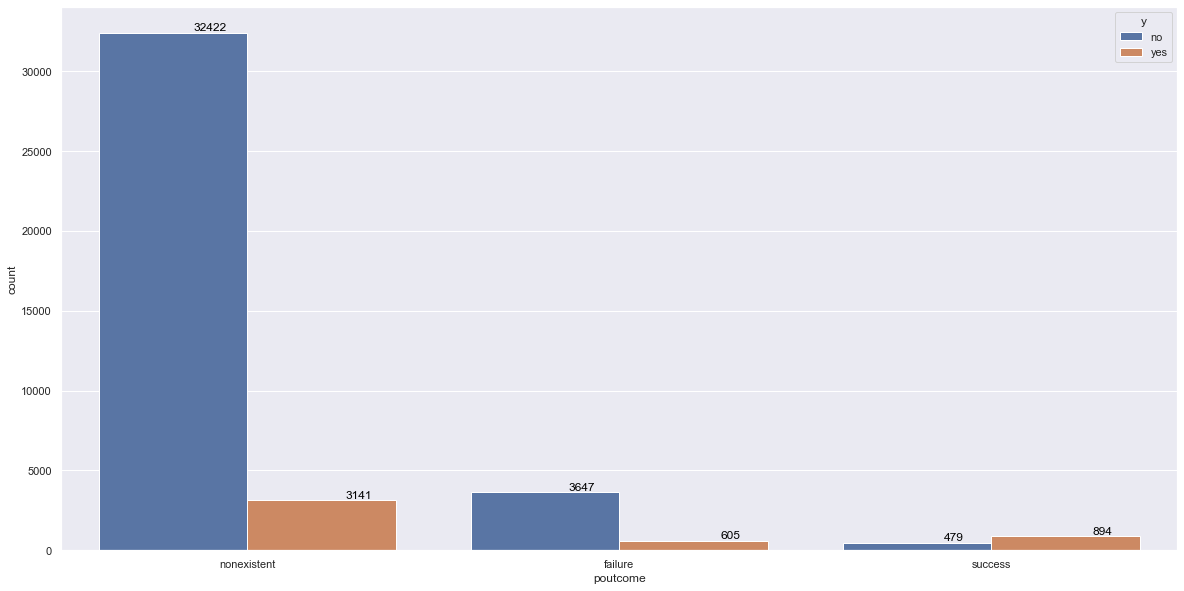

In [11]:
#poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
countplot('poutcome', df)

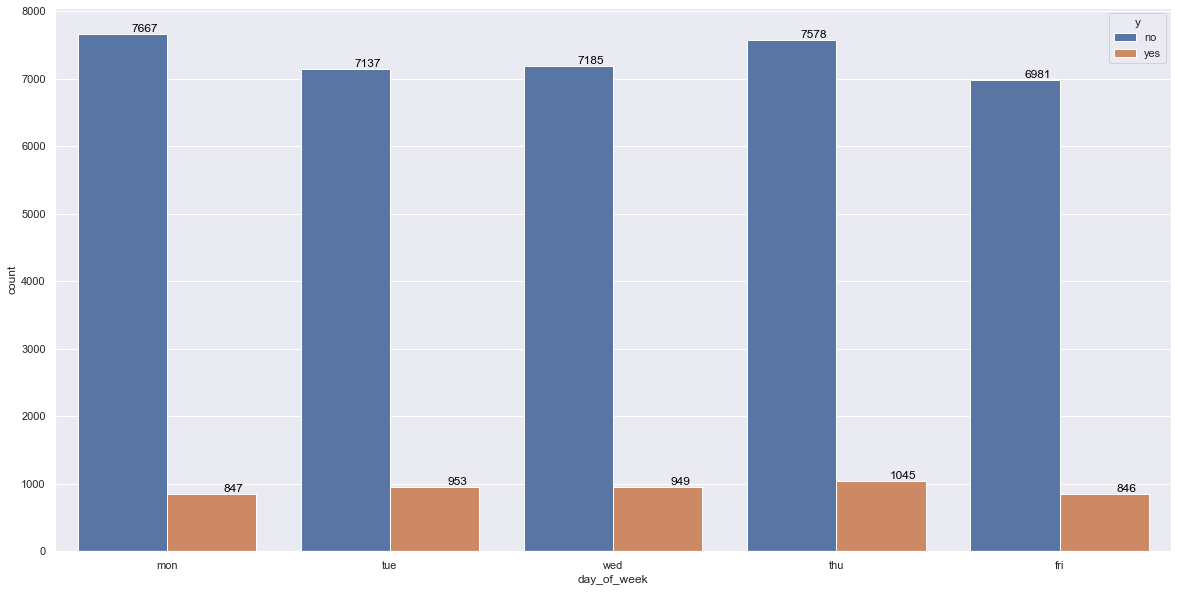

In [12]:
#day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
#not very useful feature because it is uniform
countplot('day_of_week', df)

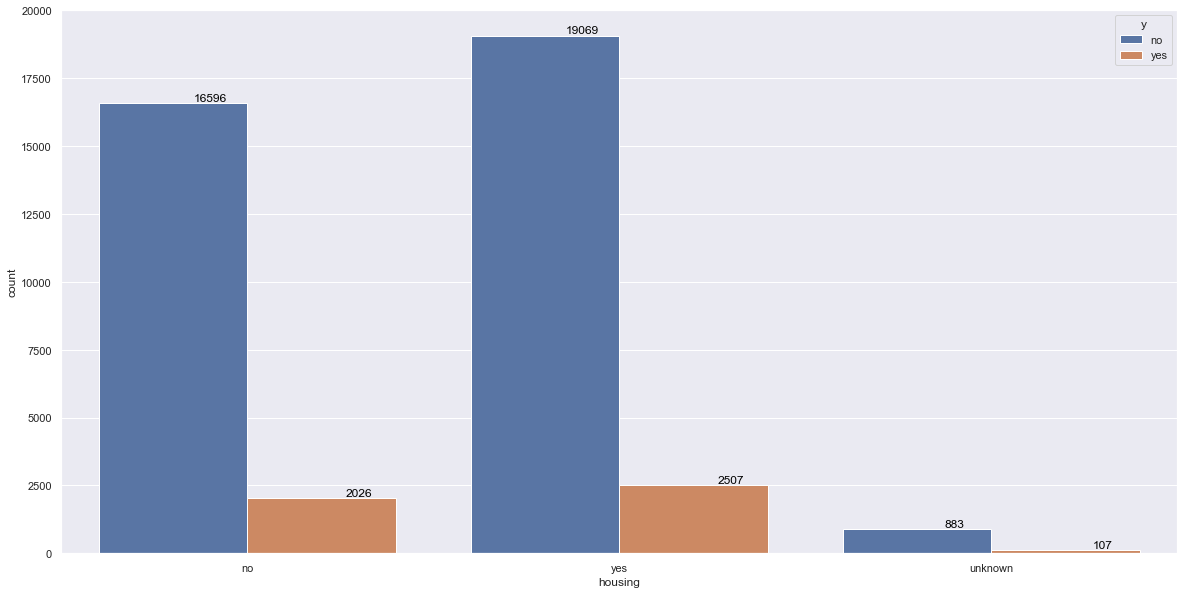

In [13]:
#housing: has housing loan? (categorical: "no","yes","unknown")
countplot('housing', df)

## Univariate analysis on Numerical features:

In [14]:
df.shape

(41188, 21)

In [15]:
# Get list of numeric variables
s = (df.dtypes != 'object')
numeric_cols = list(s[s].index)

print("numeric variables:")
print(numeric_cols)

numeric variables:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


<AxesSubplot:xlabel='y', ylabel='age'>

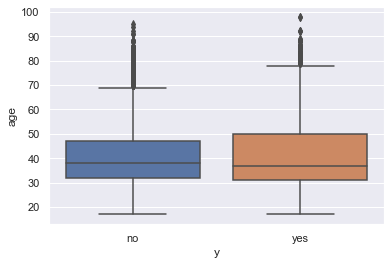

In [16]:
#Age: may not be a good indicator
sns.boxplot( x = 'y', y = 'age', data = df)

C:\Users\John\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

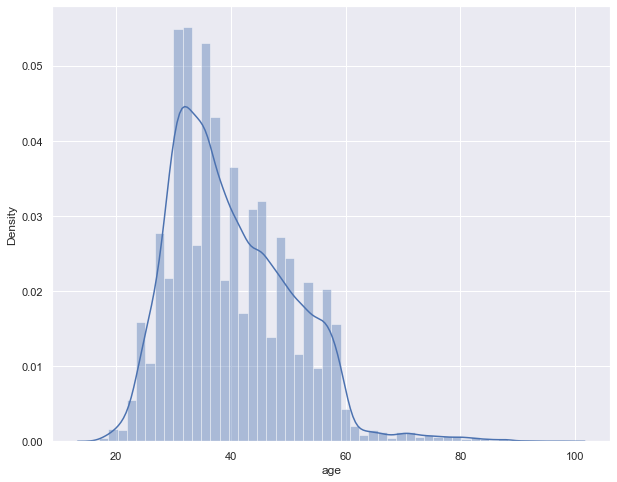

In [17]:
plt.figure(figsize= (10,8))
sns.distplot(df['age'])

<AxesSubplot:xlabel='y', ylabel='duration'>

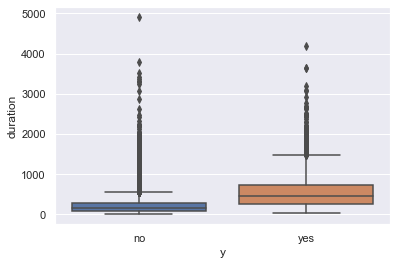

In [18]:
#Duration, bench mark parameter
sns.boxplot( x = 'y', y = 'duration', data = df)

C:\Users\John\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

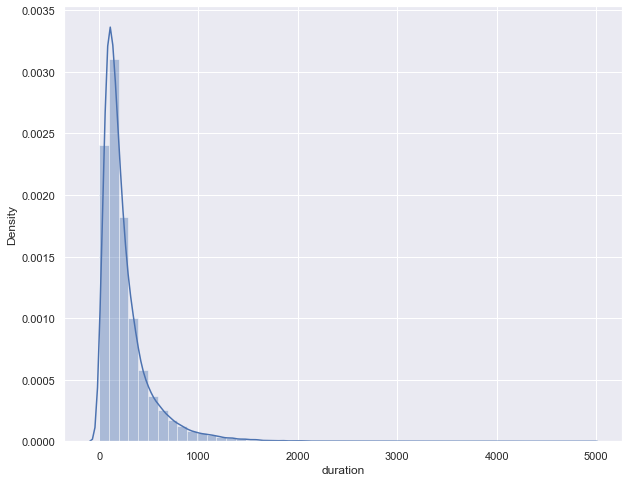

In [19]:
plt.figure(figsize= (10,8))
sns.distplot(df['duration'])

In [20]:
#emp.var.rate- employment variation rate - quarterly indicator
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

<AxesSubplot:xlabel='y', ylabel='emp.var.rate'>

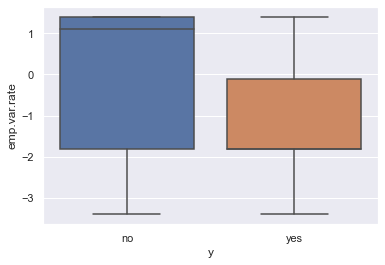

In [21]:
#emp.var.rate
sns.boxplot( x = 'y', y = 'emp.var.rate', data = df)

C:\Users\John\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emp.var.rate', ylabel='Density'>

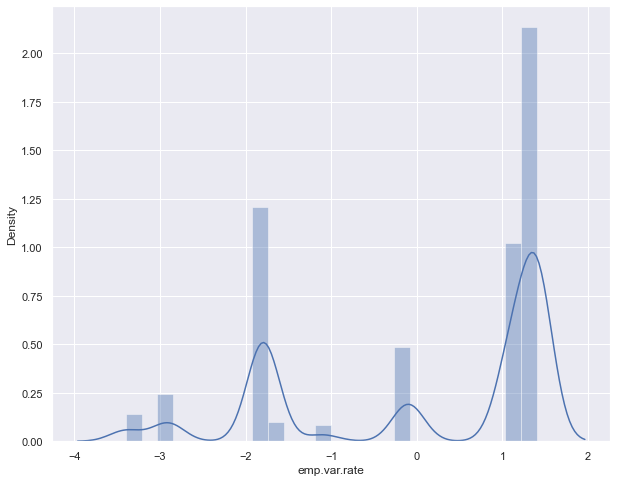

In [22]:
plt.figure(figsize= (10,8))
sns.distplot(df['emp.var.rate'])

<AxesSubplot:xlabel='y', ylabel='cons.price.idx'>

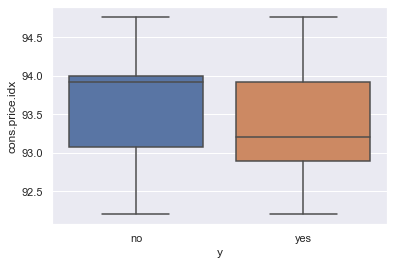

In [23]:
#cons.price.idx: consumer price index - monthly indicator (numeric)
sns.boxplot( x = 'y', y = 'cons.price.idx', data = df)

In [24]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

C:\Users\John\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cons.price.idx', ylabel='Density'>

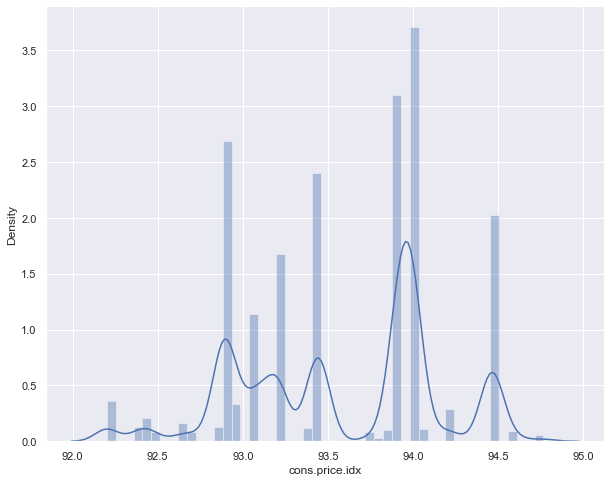

In [25]:
plt.figure(figsize= (10,8))
sns.distplot(df['cons.price.idx'])

<AxesSubplot:xlabel='y', ylabel='euribor3m'>

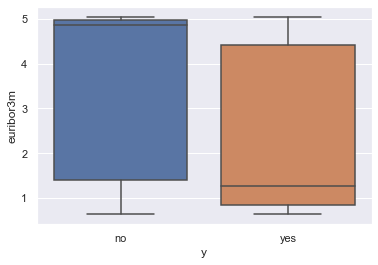

In [26]:
#The euribor denotes the basic rate of interest used in lending between banks on the European Union interbank market
#and also used as a reference for setting the interest rate on other loans.
#euribor3m: 3 month rate - daily indicator (numeric)
sns.boxplot( x = 'y', y = 'euribor3m', data = df)

C:\Users\John\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='euribor3m', ylabel='Density'>

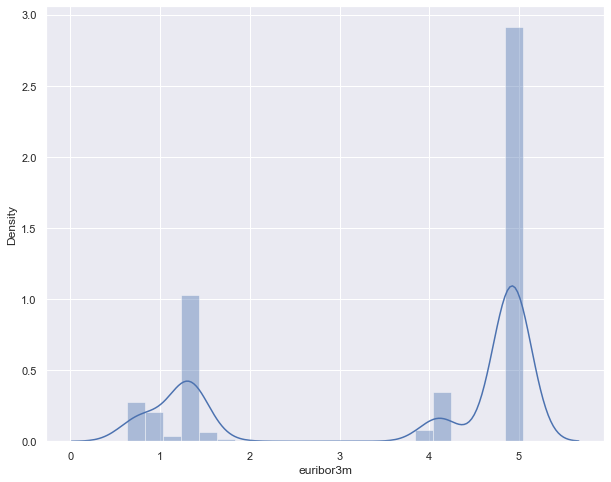

In [27]:
plt.figure(figsize= (10,8))
sns.distplot(df['euribor3m'])

## Correlation Matrix of the numerical features

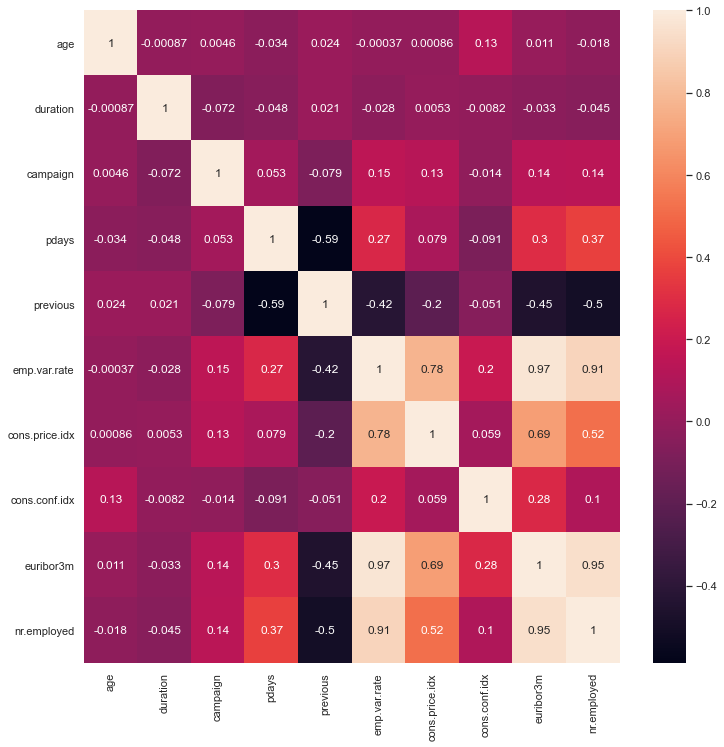

In [28]:
corr_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Data Pre-Processing

In [29]:
##missing value check
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [31]:
##drop duplicate values
data = df.drop_duplicates()
print(df.shape)
print(data.shape)

(41188, 21)
(41176, 21)


In [33]:
## separate independent and dependent variables
X = data.iloc[:,:-1]
print("shape of X:", X.shape)
y = data['y']
print("shape of y:", y.shape)

shape of X: (41176, 20)
shape of y: (41176,)


In [34]:
y[0:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [35]:
X[: 5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [37]:
print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)
print("y train shape:", y_train.shape)
print("X test shape:", X_test.shape)

X train shape: (32940, 20)
X test shape: (8236, 20)
y train shape: (32940,)
X test shape: (8236, 20)


In [38]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

In [39]:
y_train[0:5]

array([0, 1, 0, 0, 0])

In [40]:
y_test[0:5]

array([0, 0, 1, 0, 0])

In [44]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_test[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Categorical columns that will be dropped from the dataset: ['default']


In [45]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(),key=lambda x: x[1])

[('contact', 2),
 ('default', 3),
 ('housing', 3),
 ('loan', 3),
 ('poutcome', 3),
 ('marital', 4),
 ('day_of_week', 5),
 ('education', 8),
 ('month', 10),
 ('job', 12)]

In [46]:
#One-hot-encoding
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 13]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Categorical columns that will be dropped from the dataset: []


In [52]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[low_cardinality_cols]))

In [53]:
# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

In [54]:
# Remove categorical columns 
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

In [55]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [58]:
OH_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 10605 to 2733
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32940 non-null  int64  
 1   duration        32940 non-null  int64  
 2   campaign        32940 non-null  int64  
 3   pdays           32940 non-null  int64  
 4   previous        32940 non-null  int64  
 5   emp.var.rate    32940 non-null  float64
 6   cons.price.idx  32940 non-null  float64
 7   cons.conf.idx   32940 non-null  float64
 8   euribor3m       32940 non-null  float64
 9   nr.employed     32940 non-null  float64
 10  0               32940 non-null  float64
 11  1               32940 non-null  float64
 12  2               32940 non-null  float64
 13  3               32940 non-null  float64
 14  4               32940 non-null  float64
 15  5               32940 non-null  float64
 16  6               32940 non-null  float64
 17  7               32940 non-nu

In [59]:
OH_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 7403 to 38566
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8236 non-null   int64  
 1   duration        8236 non-null   int64  
 2   campaign        8236 non-null   int64  
 3   pdays           8236 non-null   int64  
 4   previous        8236 non-null   int64  
 5   emp.var.rate    8236 non-null   float64
 6   cons.price.idx  8236 non-null   float64
 7   cons.conf.idx   8236 non-null   float64
 8   euribor3m       8236 non-null   float64
 9   nr.employed     8236 non-null   float64
 10  0               8236 non-null   float64
 11  1               8236 non-null   float64
 12  2               8236 non-null   float64
 13  3               8236 non-null   float64
 14  4               8236 non-null   float64
 15  5               8236 non-null   float64
 16  6               8236 non-null   float64
 17  7               8236 non-null

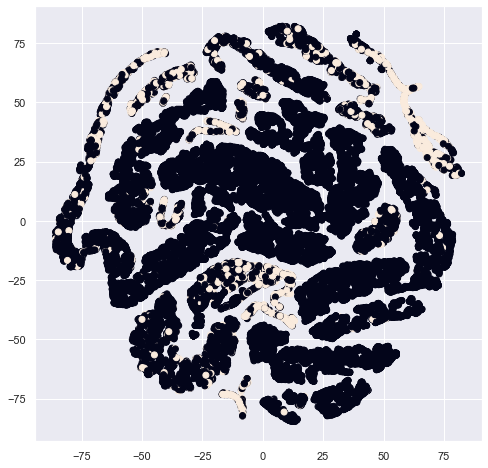

In [63]:
##TSNE plot for train dataset
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(OH_X_train)
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:,0],tsne_data[:,1], c=y_train)
plt.show()



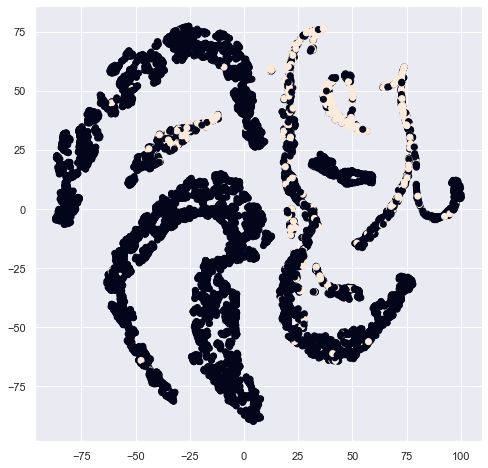

In [64]:
##TSNE plot for test dataset
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(OH_X_test)
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:,0],tsne_data[:,1], c=y_test)
plt.show()

In [71]:
#Evaluate Algorithms: Standardize Data
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [72]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,OH_X_train , y_train, cv= kfold, scoring= 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg =(name, cv_results.mean(), cv_results.std())
    print(msg)

('ScaledLR', 0.9342231604166574, 0.005202366879389326)
('ScaledLDA', 0.9327234273608307, 0.005024562330813009)
('ScaledKNN', 0.7915570265915468, 0.011089287091864596)
('ScaledCART', 0.7267391687027434, 0.010950330021894479)
('ScaledNB', 0.8276809437706225, 0.007928038603975437)
('ScaledSVM', 0.9290994196404952, 0.005230986236276849)


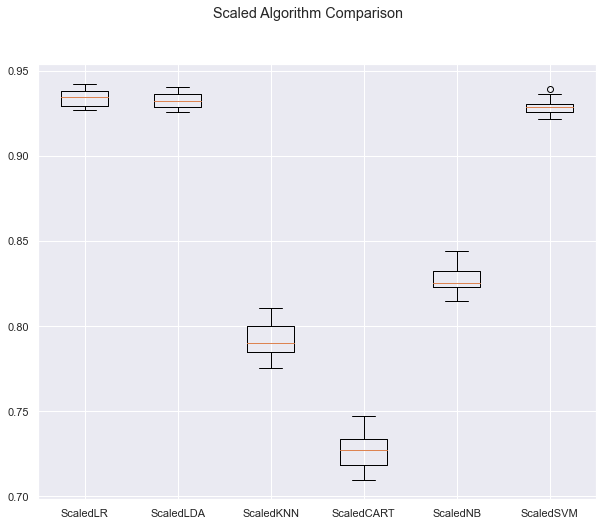

In [74]:
# Compare Algorithms
fig = plt.figure(figsize=(10,8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [75]:
# Removing duration feature 

# From Train
OH_X_trainR = OH_X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", OH_X_trainR.shape)

# From CV
OH_X_testR = OH_X_test.drop("duration", axis=1)
print("The shape of the cv dataset: ", OH_X_testR.shape)

The shape of the train dataset:  (32940, 62)
The shape of the cv dataset:  (8236, 62)


In [76]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,OH_X_trainR , y_train, cv= kfold, scoring= 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg =(name, cv_results.mean(), cv_results.std())
    print(msg)

('ScaledLR', 0.7857986959904087, 0.012993386638128815)
('ScaledLDA', 0.7824204615900592, 0.014541729154161697)
('ScaledKNN', 0.7158201522545798, 0.01172593724377927)
('ScaledCART', 0.6216057372104733, 0.016214680277706412)
('ScaledNB', 0.7629842293402194, 0.010678190888744082)
('ScaledSVM', 0.7105425842420495, 0.015298579978053489)


In [77]:
# prepare the model
scaler = StandardScaler().fit(OH_X_trainR)
rescaledX = scaler.transform(OH_X_trainR)
model = LogisticRegression()
model.fit(rescaledX, y_train)

LogisticRegression()

In [82]:
# without "duration" column
scaler = StandardScaler().fit(OH_X_trainR)
rescaledX = scaler.transform(OH_X_trainR)
model = LogisticRegression(class_weight='balanced')
model.fit(rescaledX, y_train)



LogisticRegression(class_weight='balanced')

In [84]:
# estimate accuracy on test dataset
rescaledtestX = scaler.transform(OH_X_testR)
y_pred = model.predict_proba(rescaledtestX)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column:  0.812211281549633


## Ensemble Methods


In [88]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('XGB', XGBClassifier()))

In [89]:
results = []
names = []
scoring = 'roc_auc'
for name, model in ensembles:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, OH_X_trainR, y_train, cv= kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.787781 (0.014273)
GBM: 0.792884 (0.013584)
RF: 0.768452 (0.011409)
ET: 0.740676 (0.012391)
XGB: 0.794649 (0.012961)


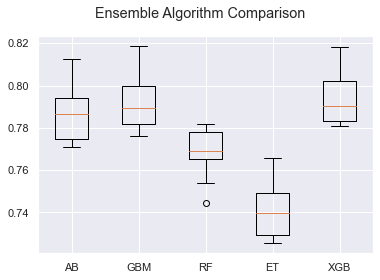

In [90]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()